In [1]:
import experiment as exp

Invoking __init__.py for NDNT.utils


In [2]:
e = exp.load('exp_CNIM', 'experiments')

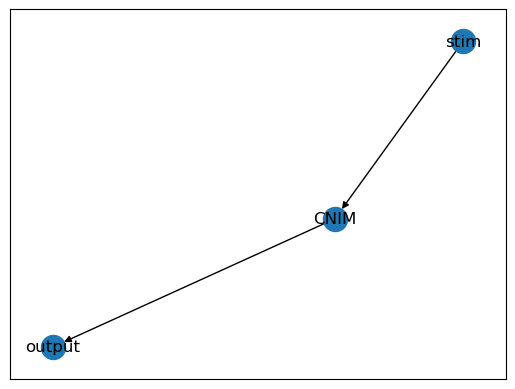

In [3]:
e.trials_where(name='CNIM_NF4_expt04')[0].model.draw_network()

In [4]:
e.trials

,num_filters,expt,name,trial
0,4,expt04,CNIM_NF4_expt04,<experiment.Trial object at 0x7f32813432b0>
0,4,expt04+expt05,CNIM_NF4_expt04+expt05,<experiment.Trial object at 0x7f3281291ac0>
0,4,expt04+expt05+expt06,CNIM_NF4_expt04+expt05+expt06,<experiment.Trial object at 0x7f3281208580>
0,4,expt04+expt05+expt06+expt07,CNIM_NF4_expt04+expt05+expt06+expt07,<experiment.Trial object at 0x7f328134d610>
0,6,expt04,CNIM_NF6_expt04,<experiment.Trial object at 0x7f328125c370>
0,6,expt04+expt05,CNIM_NF6_expt04+expt05,<experiment.Trial object at 0x7f328fbf00a0>
0,6,expt04+expt05+expt06,CNIM_NF6_expt04+expt05+expt06,<experiment.Trial object at 0x7f32812f7fd0>
0,6,expt04+expt05+expt06+expt07,CNIM_NF6_expt04+expt05+expt06+expt07,<experiment.Trial object at 0x7f32813cac40>
0,8,expt04,CNIM_NF8_expt04,<experiment.Trial object at 0x7f32812c5730>
0,8,expt04+expt05,CNIM_NF8_expt04+expt05,<experiment.Trial object at 0x7f3281339640>


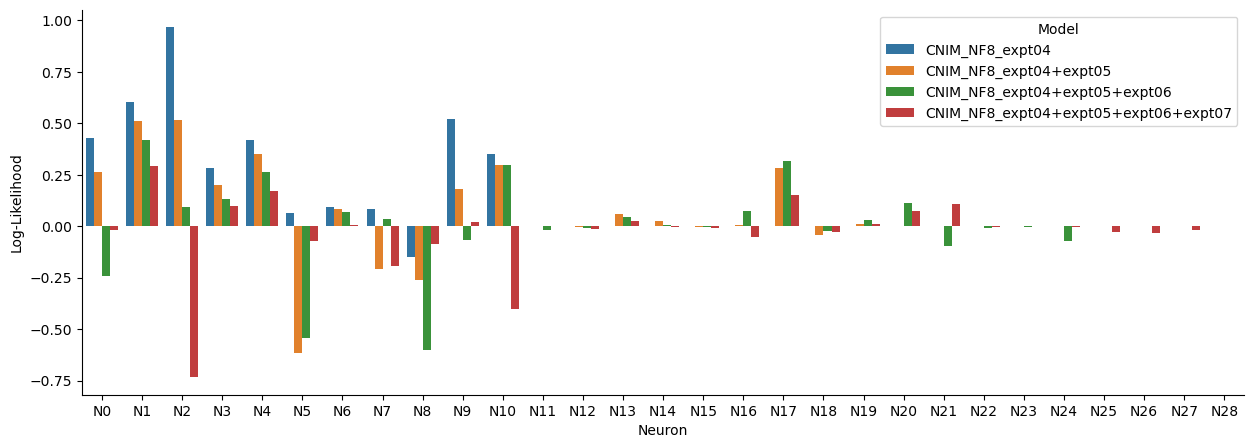

In [5]:
e.plot_LLs(trials=e.trials_where(num_filters=8))

lazy loading losses
lazy loading losses
lazy loading losses
lazy loading losses


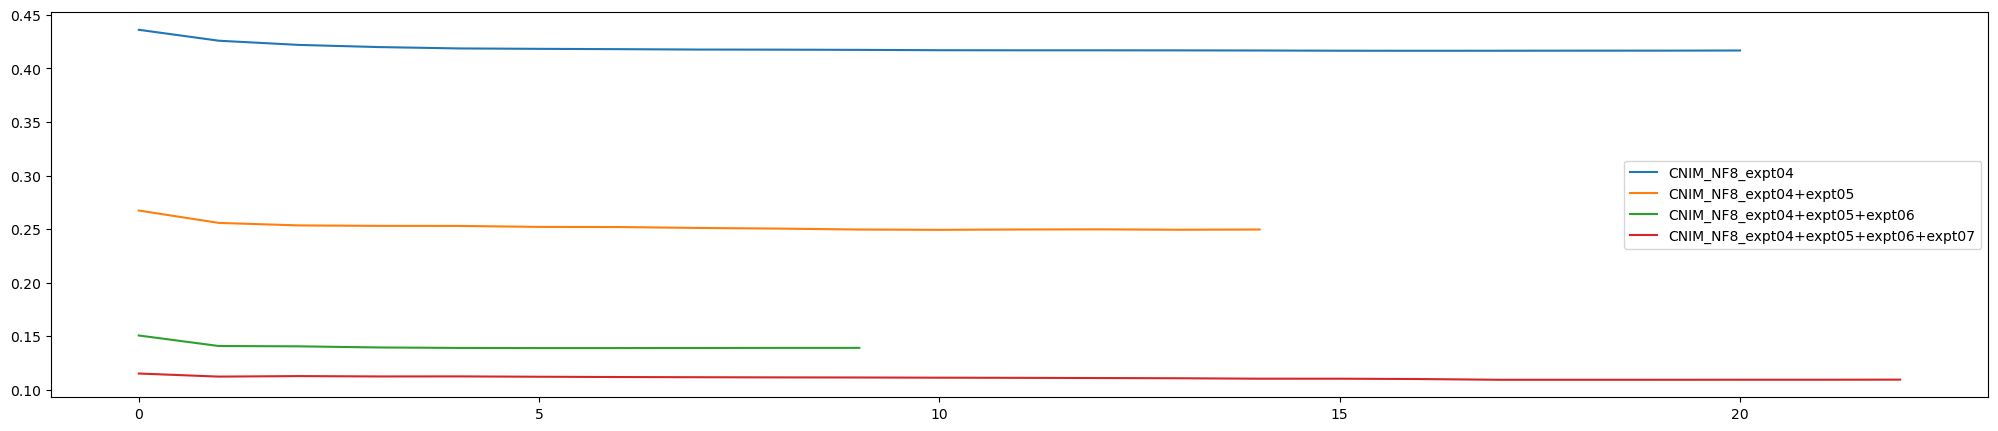

In [6]:
e.plot_losses(trials=e.trials_where(num_filters=8), figsize=(25,5))

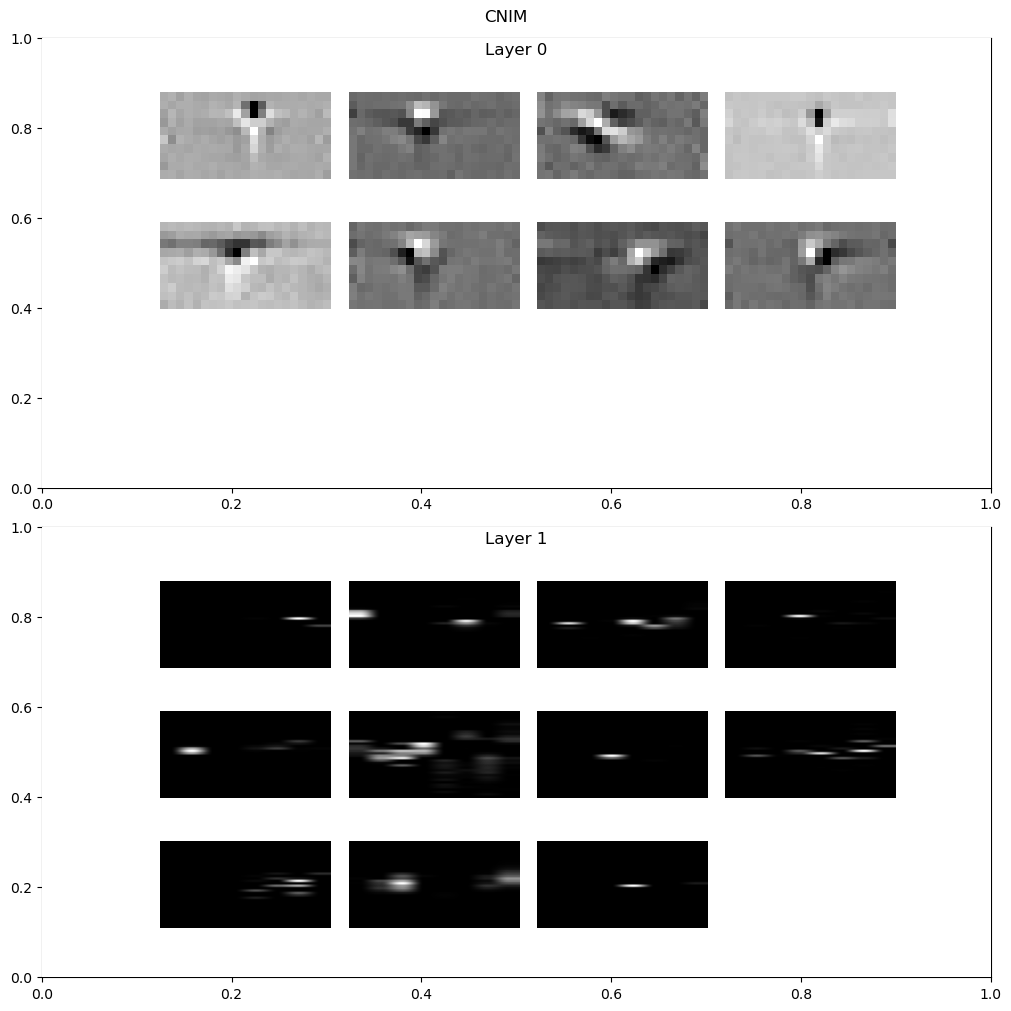

In [7]:
import plot
from importlib import reload
reload(plot)
#plot.darkmode()
plot.lightmode()
model = e.trials_where(name='CNIM_NF8_expt04')[0].model
plot.plot_network_weights(model.networks[0], wspace=0.1, hspace=0.5, max_cols=4, figsize=(10,10))

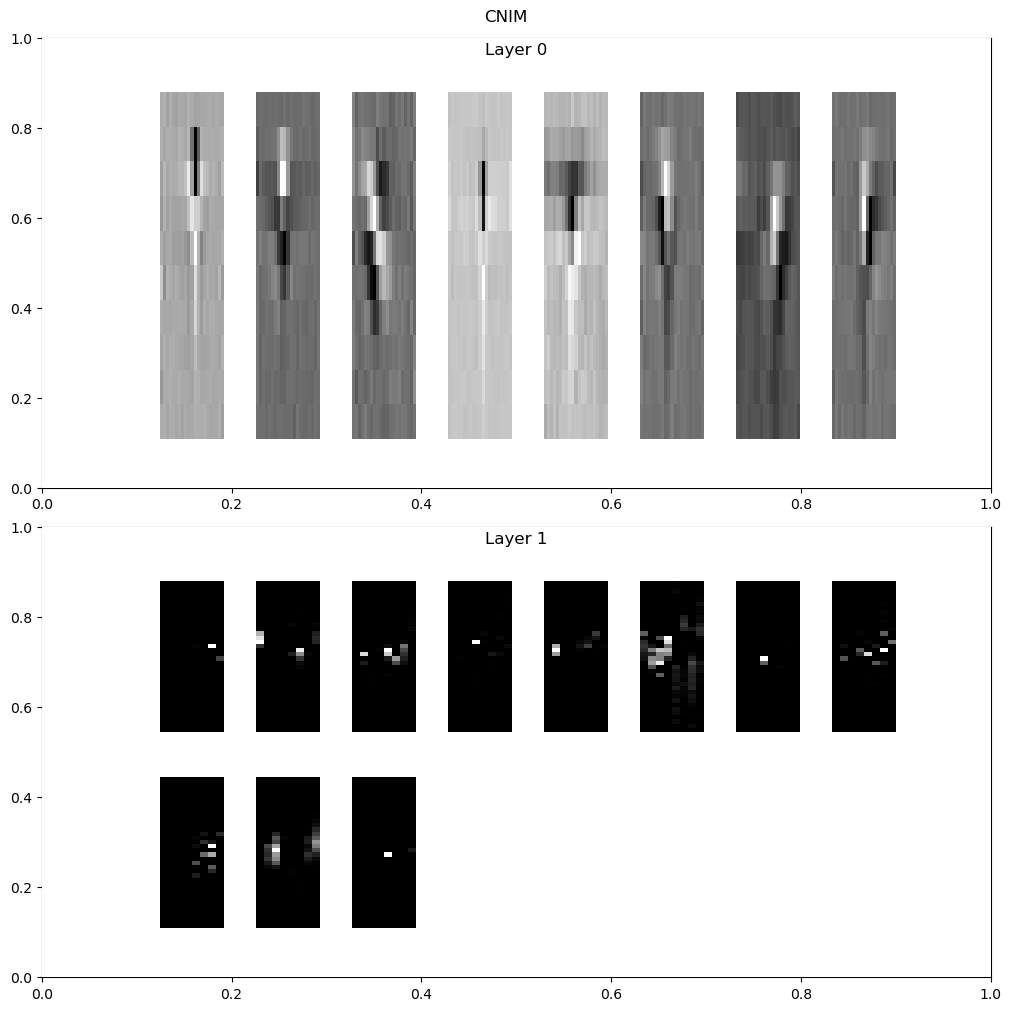

In [8]:
# test plotting model weights
plot.plot_model_weights(model)

In [9]:
from NTdatasets.cumming.monocular import MultiDataset
num_lags = 10
expts = ['expt04']
data = MultiDataset(
    datadir='./Mdata', filenames=expts, include_MUs=False,
    time_embed=True, num_lags=num_lags )

data.stim.shape, data.stim_dims

Loading expt04
  Time embedding...
  Done.


(torch.Size([362504, 360]), [1, 36, 1, 10])

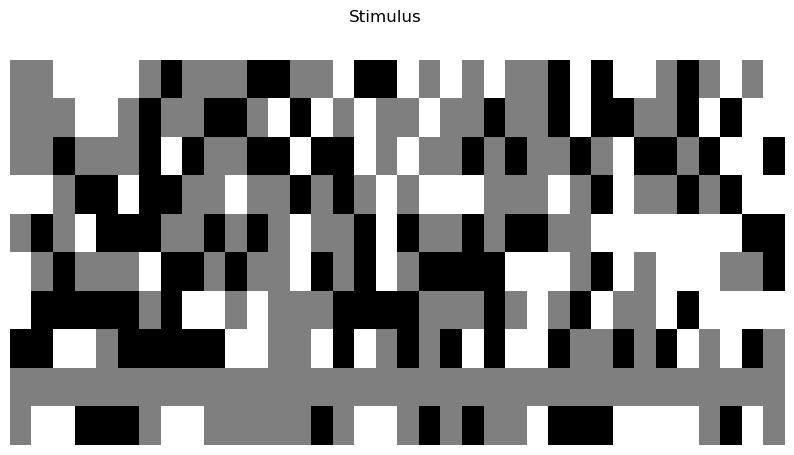

In [10]:
# test plotting stimulus
reload(plot)
plot.plot_stim(data.stim[1], (data.stim_dims[1],data.stim_dims[3]))

In [11]:
data.robs.shape

torch.Size([362504, 11])

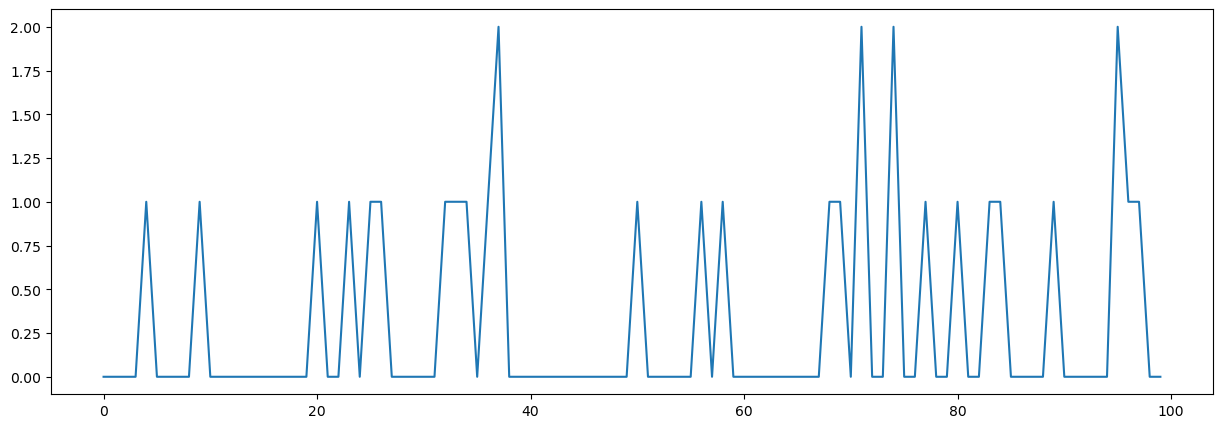

In [12]:
# test plotting response
import numpy as np
plot.plot_robs(data.robs[:100,6], smooth=None, figsize=(15,5))

In [95]:
# test predicting using model
import predict
reload(predict)
results = predict.predict(model, data.stim[:100], data.robs, verbose=False)
print(len(results.outputs), len(results.outputs[0]), len(results.outputs[0]['CNIM']), results.outputs[0]['CNIM'][0].shape)
print(results.outputs_shape)

print(results.pred.shape)

predict.predict(model=model, dataset=data, verbose=True)

100 1 2 (1, 288)
(100, 1, 2, (1, 288))
(100, 11)
num_inps 362504
torch.Size([362504, 360]) --> torch.Size([362504, 288])
torch.Size([362504, 288]) --> torch.Size([362504, 11])


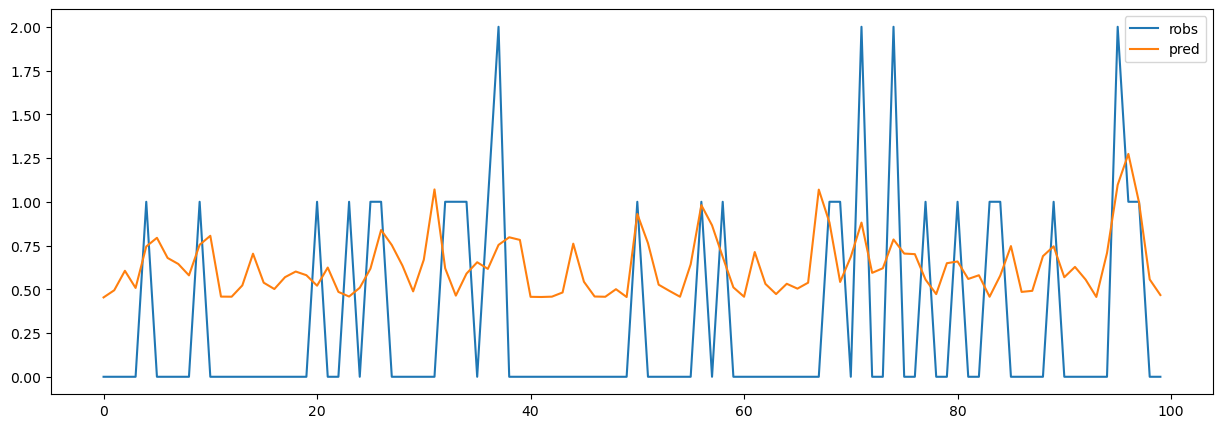

In [98]:
# test plotting model weights and predictions
reload(plot)
plot.plot_robs(data.robs[:100,6], results.pred[:100,6], smooth=None, figsize=(15,5))

In [96]:
# make the prediction use valid data filters (data.dfs)
